# Seaborn 4

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
%matplotlib inline

In [9]:
tips = sns.load_dataset('tips')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


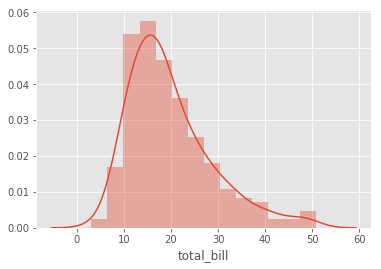

In [11]:
# Distribution plot
sns.distplot(tips['total_bill'])

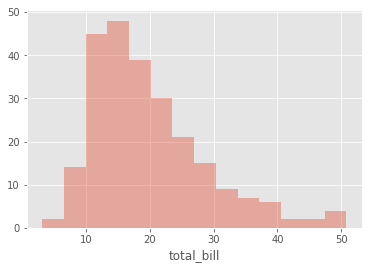

In [12]:
sns.distplot(tips['total_bill'],kde=False)

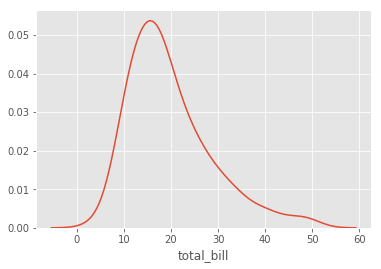

In [13]:
sns.distplot(tips['total_bill'],hist=False)

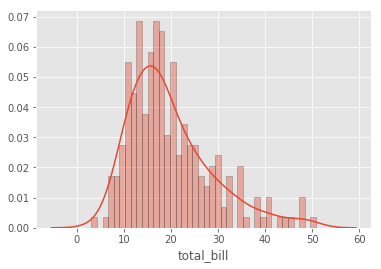

In [17]:
sns.distplot(tips['total_bill'],bins=40,hist_kws={
    'edgecolor':'black'
})

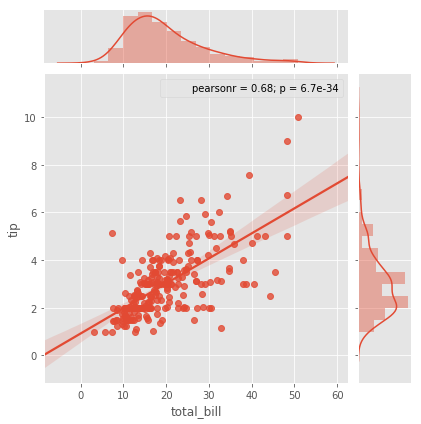

In [26]:
# Joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

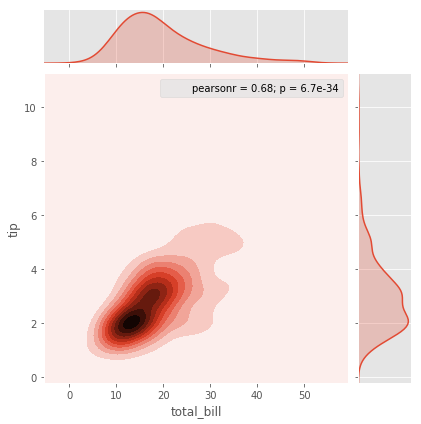

In [27]:
# Joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

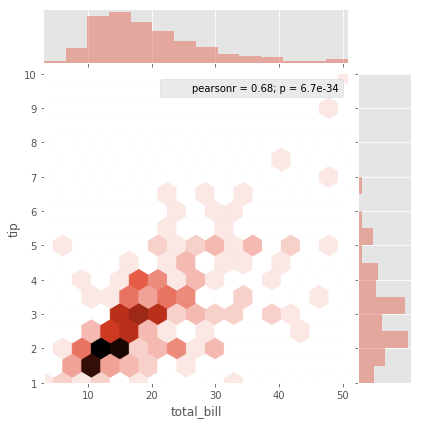

In [28]:
# Joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

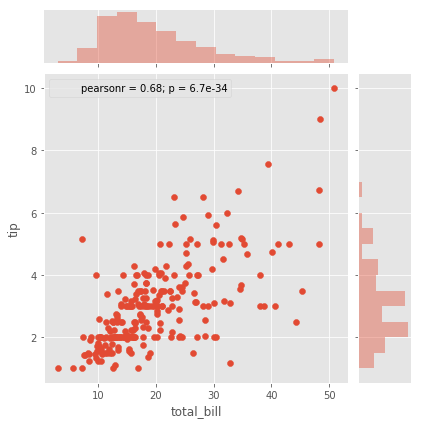

In [29]:
# Joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

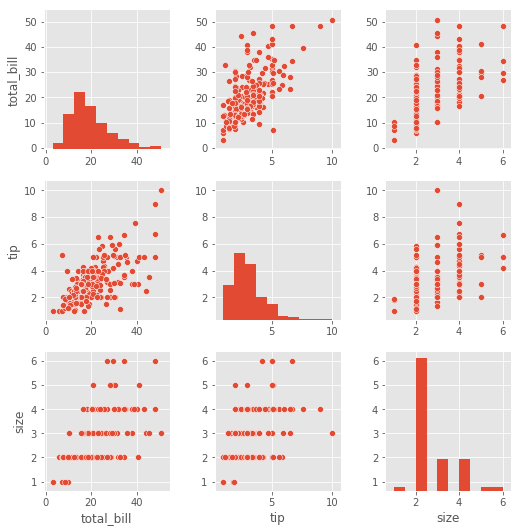

In [30]:
# Pairplot
sns.pairplot(tips)

***
Adding hue in this example

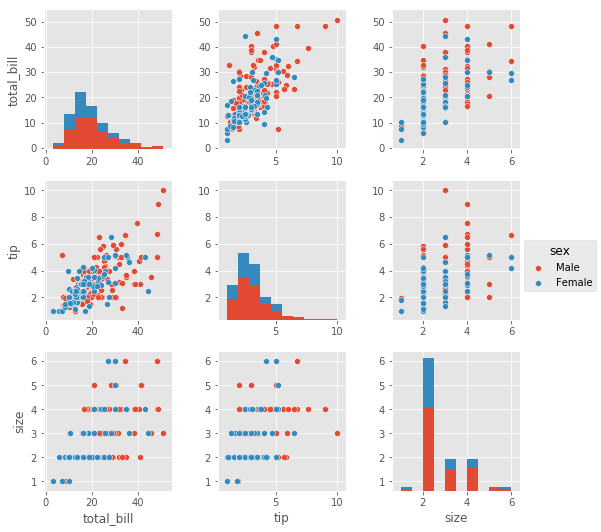

In [31]:
sns.pairplot(tips,hue='sex')

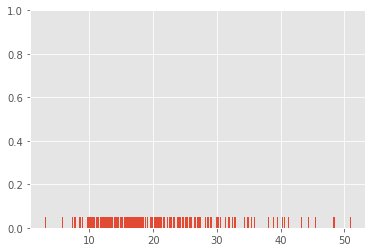

In [32]:
# Rugplots
sns.rugplot(tips['total_bill'])

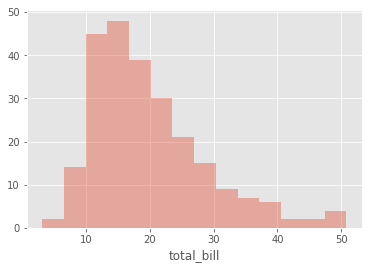

In [33]:
sns.distplot(tips['total_bill'],kde=False)

### Building a KDE plot manually
KDE (Kernel density estimation) plots are gaussian dist plots
This example will create a kde plot manually

(0, 1)

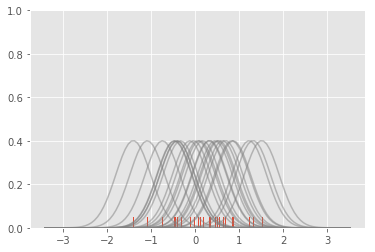

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

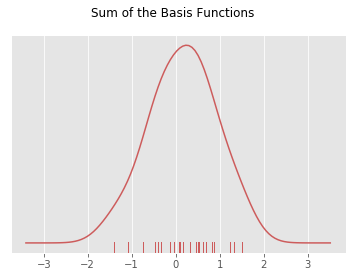

In [37]:
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

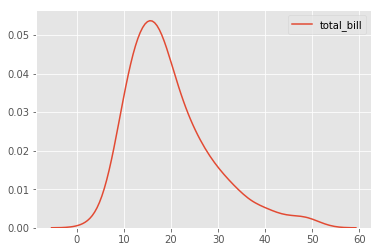

In [38]:
sns.kdeplot(tips['total_bill'])